In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

dataSet = pd.read_csv("Dataset_spine.csv")
dataSet.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


**Como podemos ver acima, o dataset tem uma coluna "extra" que não agrega valor algum ao nosso objetivo neste projeto. Então damos pop nela:**

In [14]:
dataSet.pop('Unnamed: 13')
dataSet.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


**Colocando os nomes das colunas como elas são apresentandas no Kaggle**

In [46]:
dataSet.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [47]:
dataSet.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


**Histograma de cada Feature**

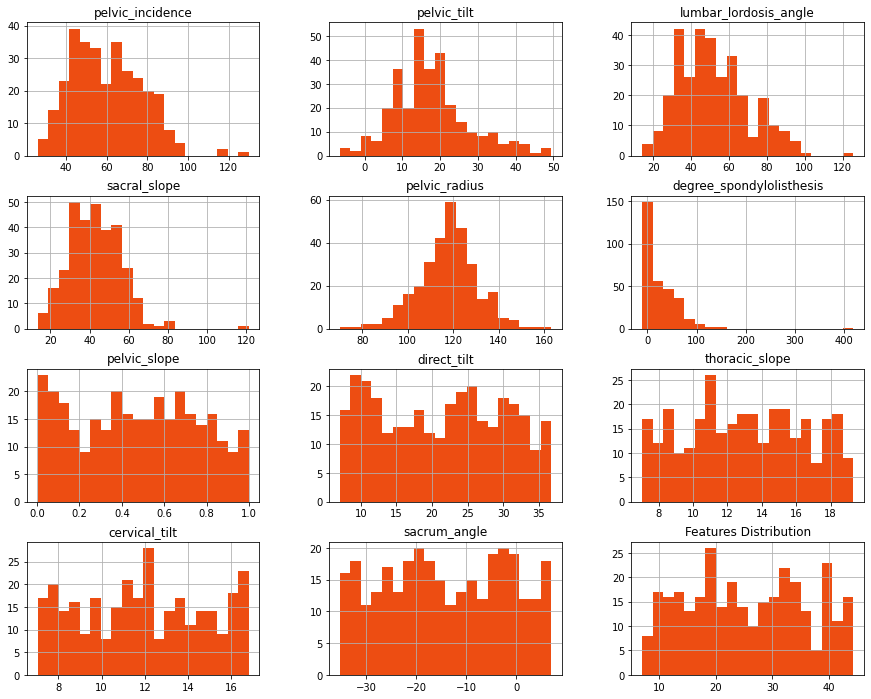

In [49]:
dataSet.hist(figsize=(15,12),bins = 20, color="#ED4D12")
plt.title("Features Distribution")
plt.show()

**Agora vamos separar o dataset em um dataset de treino e outro para teste numa proporção de 90% e 10% do dataset original respectivamente.**

In [32]:
y = dataSet['class']
x = dataSet.drop(['class'], axis=1)
#x.head()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
classifier = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Iteration 1, loss = 8.98594301
Iteration 2, loss = 7.05677360
Iteration 3, loss = 5.07494294
Iteration 4, loss = 3.15879084
Iteration 5, loss = 1.92677140
Iteration 6, loss = 2.30199414
Iteration 7, loss = 2.55667704
Iteration 8, loss = 1.91733321
Iteration 9, loss = 1.11596220
Iteration 10, loss = 0.98212160
Iteration 11, loss = 1.13524991
Iteration 12, loss = 1.11342880
Iteration 13, loss = 0.88739876
Iteration 14, loss = 0.65271715
Iteration 15, loss = 0.59331211
Iteration 16, loss = 0.65795964
Iteration 17, loss = 0.67977053
Iteration 18, loss = 0.60940343
Iteration 19, loss = 0.52282014
Iteration 20, loss = 0.50298989
Iteration 21, loss = 0.53660738
Iteration 22, loss = 0.55284067
Iteration 23, loss = 0.52213197
Iteration 24, loss = 0.48410391
Iteration 25, loss = 0.48131245
Iteration 26, loss = 0.49131436
Iteration 27, loss = 0.49112501
Iteration 28, loss = 0.46945418
Iteration 29, loss = 0.45796546
Iteration 30, loss = 0.46049639
Iteration 31, loss = 0.46585709
Iteration 32, los

In [34]:
accuracy_score(y_test, y_pred)

0.9354838709677419

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.95      0.95      0.95        20
      Normal       0.91      0.91      0.91        11

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



**Podemos ver que a precisão da classificação de casos normais é menor. Isso possivelmente se dá por conta do fato de existirem mais casos anormais na amostra, como mostrado abaixo. Testaremos esta hipótese mais a frente.**

In [36]:
y.value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64